In [1]:
import os
import sys
# add parent directory to path to be able to load local RLC lib.
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%load_ext autoreload
%autoreload 2

# View coupled to planning

Model-based methods rely on planning as their primary component, while model-free methods primarily rely on learning.
Moreover, all the methods are based on looking ahead to future events, computing a backed-up value, and then using it as an update target for an approximate value function.
By a model of the environment we mean anything that an agent can use to predict how the environment will respond to its actions. Given a state and an action, a model produces a prediction of the resultant next state and next reward. If the model is stochastic, then there are several possible next states and next rewards, each with some probability of occurring. Some models produce a description of all possibilities and their probabilities; these we call distribution models. Other models produce just one of the possibilities, sampled according to the probabilities; these we call sample models.
Distribution models are stronger than sample models in that they can always be used to produce samples. However, in many applications it is much easier to obtain sample models than distribution models.
The word planning is used in several di↵erent ways in di↵erent fields. We use the term to refer to any computational process that takes a model as input and produces or improves a policy for interacting with the modeled environment.
State-space planning, which includes the approach we take in this book, is viewed primarily as a search through the state space for an optimal policy or an optimal path to a goal. Actions cause transitions from state to state, and value functions are computed over states. In what we call plan-space planning, planning is instead a search through the space of plans.
Plan-space methods are difficult to apply efficiently to the stochastic sequential decision problems that are the focus in reinforcement learning, and we do not consider them further
(1) all state-space planning methods involve computing value functions as a key intermediate step toward improving the policy, and (2) they compute value functions by updates or backup operations applied to simulated experience.
The heart of both learning and planning methods is the estimation of value functions by backing-up update operations. The difference is that whereas planning uses simulated experience generated by a model, learning methods use real experience generated by the environment.
Learning methods require only experience as input, and in many cases they can be applied to simulated experience just as well as to real experience.
 benefits of planning in small, incremental steps. This enables planning to be interrupted or redirected at any time with little wasted computation, which appears to be a key requirement for effciently intermixing planning with acting and with learning of the model. Planning in very small steps may be the most effcient approach even on pure planning problems if the problem is too large to be solved exactly.


<div>
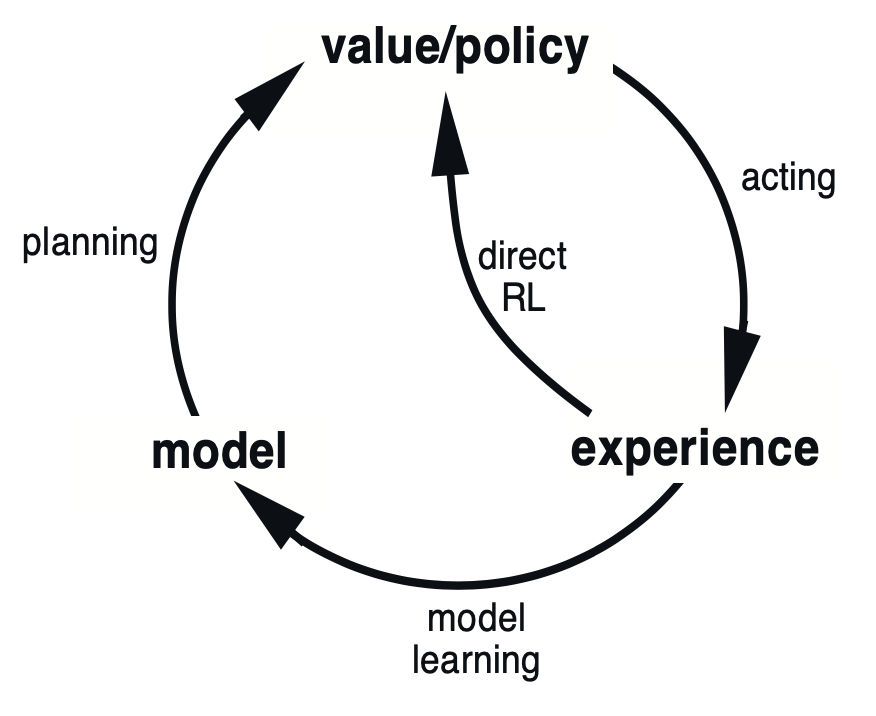
</div>

 Note how experience can improve
value functions and policies either directly or in-
directly via the model. It is the latter, which is
sometimes called indirect reinforcement learning,
that is involved in planning.
Both direct and indirect methods have advantages and disadvantages. Indirect methods often make fuller use of a limited amount of experience and thus achieve a better policy with fewer environmental interactions. On the other hand, direct methods are much simpler and are not affected by biases in the design of the model.
Typically, as in Dyna-Q, the same reinforcement learning method is used both for learning from real experience and for planning from simulated experience. The reinforcement learning method is thus the “final common path” for both learning and planning. Learning and planning are deeply integrated in the sense that they share almost all the same machinery, di↵ering only in the source of their experience.
In Dyna-Q, the acting, model-learning, and direct RL processes require little computation, and we assume they consume just a fraction of the time. The remaining time in each step can be devoted to the planning process, which is inherently computation-intensive.

# TODO: write out dyna Q

important is step f which is the planning step. n can bootstrap nr of episodes needed to learn the problem.
Without planning (n = 0), each episode adds only one additional step to the policy, and so only one step (the last) has been learned so far. With planning, again only one step is learned during the first episode, but here during the second episode an extensive policy has been developed.

When the model is incorrect, the planning process is likely to compute a suboptimal policy.
In some cases, the suboptimal policy computed by planning quickly leads to the discovery and correction of the modeling error. This tends to happen when the model is optimistic in the sense of predicting greater reward or better state transitions than are actually possible. The planned policy attempts to exploit these opportunities and in doing so discovers that they do not exist.
Greater diffculties arise when the environment changes to become better than it was before, and yet the formerly correct policy does not reveal the improvement. In these cases the modeling error may not be detected for a long time, if ever.
Even with an "-greedy policy, it is very unlikely that an agent will take so many exploratory actions as to dis- cover the shortcut.
We want the agent to explore to find changes in the environment, but not so much that performance is greatly degraded. As in the earlier exploration/exploitation conflict, there probably is no solution that is both perfect and practical, but simple heuristics are often e↵ective.
To encourage behavior that tests
long-untried actions, a special “bonus reward” is given on simulated experiences involving
these actions. In particular, if the modeled reward for a transition is r, and the transition
has not been tried in tau time steps, then planning updates are done as if that transition
produced a reward of r + kappa sqrt(tau), for some small kappa.
<div>
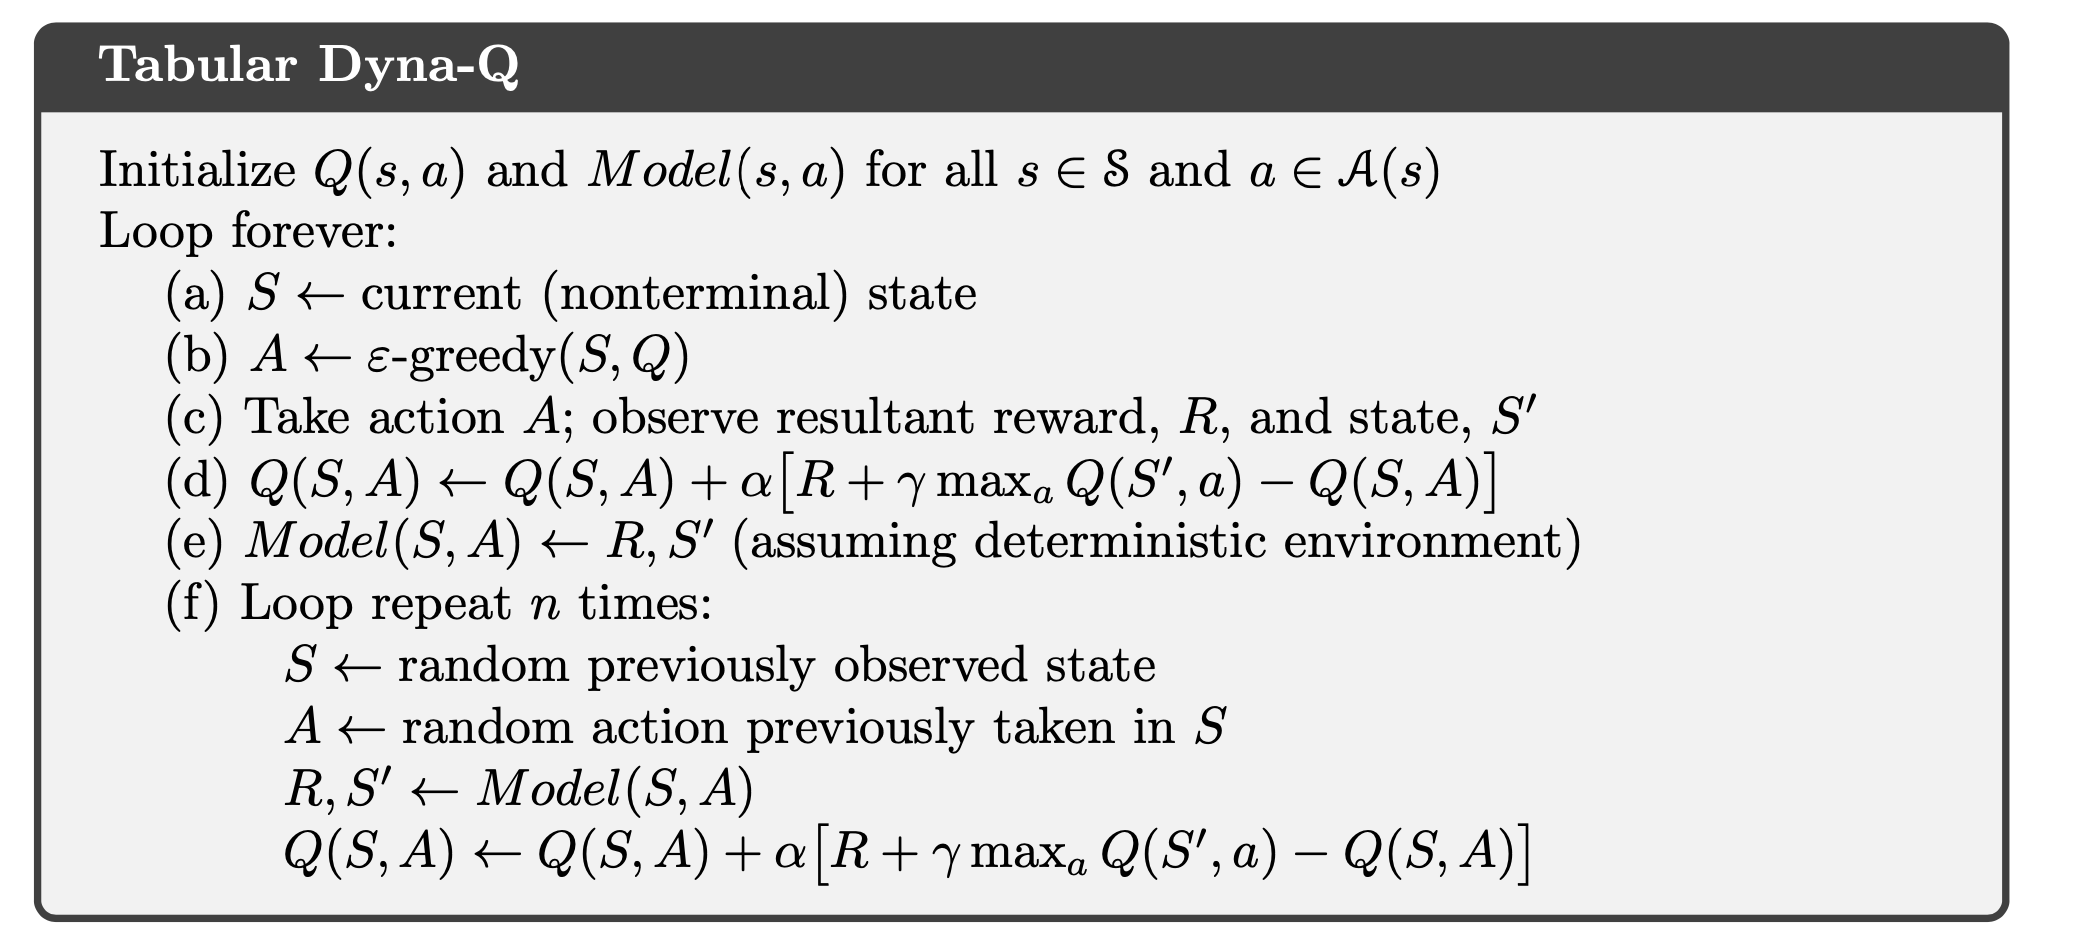
</div>

# todo write out dyna-q with prioritized sweeping

It is natural to prioritize the updates according to a measure of their urgency, and perform them in order of priority. This is the idea behind prioritized sweeping. A queue is maintained of every state–action pair whose estimated value would change nontrivially if updated , prioritized by the size of the change. When the top pair in the queue is updated, the e↵ect on each of its predecessor pairs is computed. If the e↵ect is greater than some small threshold, then the pair is inserted in the queue with the new priority

<div>
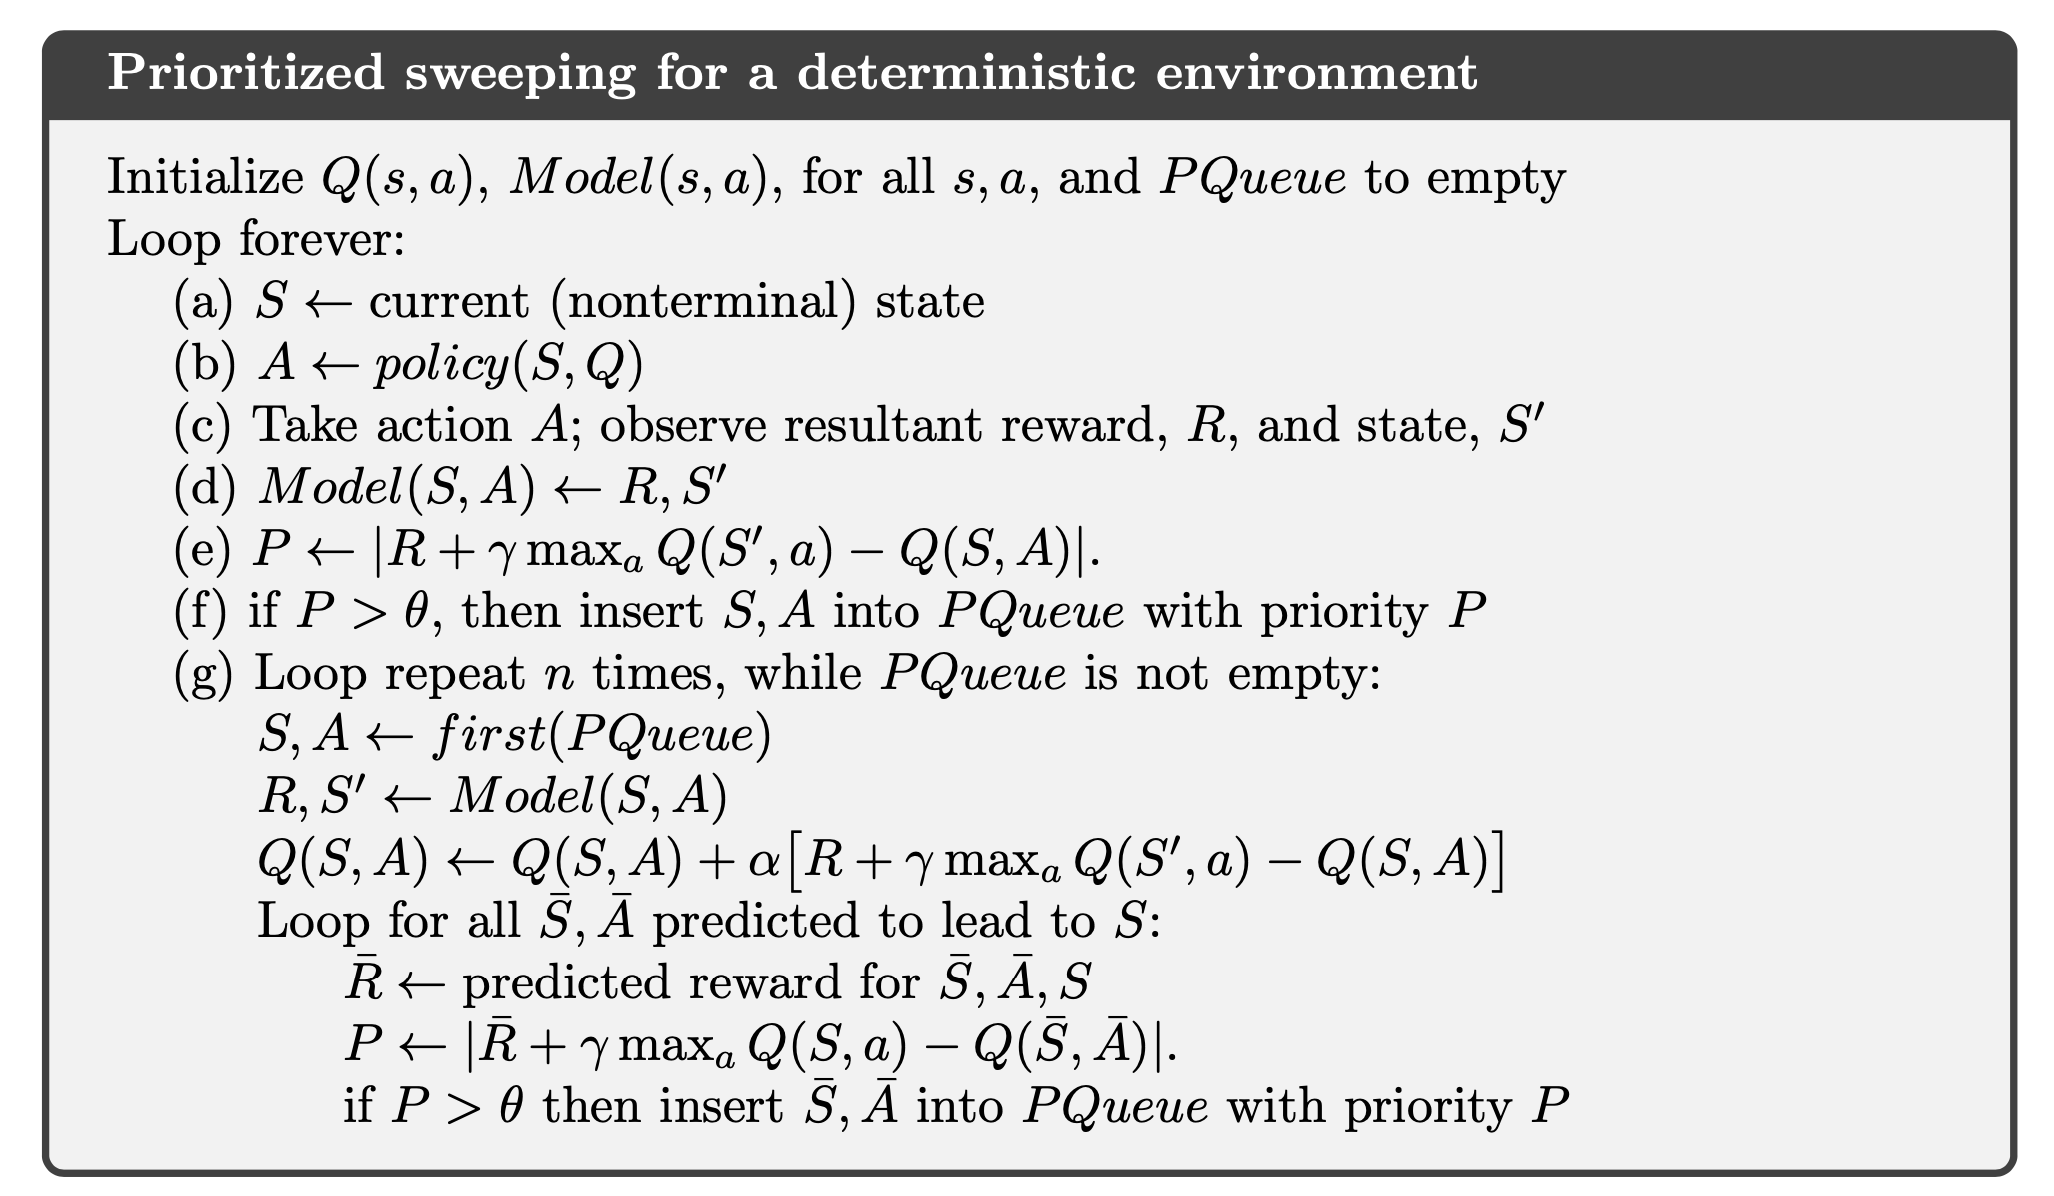
</div>

Prioritized sweeping is just one way of distributing computations to improve planning efficiency, and probably not the best way. One of prioritized sweeping’s limitations is that it uses expected updates, which in stochastic environments may waste lots of computation on low-probability transitions. Sample updates can in many cases get closer to the true value function with less computation despite the variance introduced by sampling. This idea was taken to what may be its logical limit in the “small backups” introduced by van Seijen and Sutton (2013). These are updates along a single transition, like a sample update, but based on the probability of the transition without sampling, as in an expected update.
By selecting the order in which small updates are done it is possible to greatly improve planning efficiency beyond that possible with prioritized sweeping.

# trajectory sampling

In trajectory sampling one simulates explicit individual trajectories and performs updates at the state or state–action pairs encountered along the way. In the short term, sampling according to the on-policy distribution helps by focusing on states that are near descendants of the start state. If there are many states and a small branching factor, this e↵ect will be large and long-lasting. In the long run, focusing on the on-policy distribution may hurt because the commonly occurring states all already have their correct values. Sampling them is useless, whereas sampling other states may actually perform some useful work. This presumably is why the exhaustive, unfocused approach does better in the long run, at least for small problems. These results are not conclusive because they are only for problems generated in a particular, random way, but they do suggest that sampling according to the on-policy distribution can be a great advantage for large problems, in particular for problems in which a small subset of the state–action space is visited under the on-policy distribution.

# decision time planning

background planning happens when before an action is selected for the current state, the planning has played part in improving the expression needed to select the action for many states. i.e. the planning is not focused on the current state. In decision time planning after each new state a computation is started whose output is the selection of a single next action. Because the results created by the planning is mostly discarded after the action this type is mainly used when a fast response is not required.

## heuristic search

For each state encountered a large tree of possible continuations is considered. The approximate value function is applied to the leaf nodes and then backed up toward the current state at the root. The best backed-up value is then chosen as the current action and all backed-up values are discarded.

The point of searching deeper than one step is to obtain better action selections. If one has a perfect model and an imperfect action-value function, then in fact deeper search will usually yield better policies.
the episode, then the e↵ect of the imperfect value function is eliminated, and the action determined in this way must be optimal. If the search is of sufficient depth k such that $\gamma^{k}$ is very small, then the actions will be correspondingly near optimal. On the other hand, the deeper the search, the more computation is required, usually resulting in a slower response time.

## rollout algorithms

the goal of a rollout algorithm is not to estimate a complete optimal action-value function, q⇤, or a complete action-value function, q⇡, for a given policy ⇡. Instead, they produce Monte Carlo estimates of action values only for each current state and for a given policy usually called the rollout policy. The policy improvement theorem tells us that given any two policies $\pi$ and $\pi'$ that are identical except that $\pi'(s) = a \ne \pi(s)$ for some state s, if $q_{\pi}(s,a) \ge v_{\pi}(s)$, then policy $\pi'$ is as good as, or better, than $\pi$. In other words, the aim of a rollout algorithm is to improve upon the rollout policy; not to find an optimal policy. As decision-time planning methods, rollout algorithms usually have to meet strict time constraints. The computation time needed by a rollout algorithm depends on the number of actions that have to be evaluated for each decision, the number of time steps in the simulated trajectories needed to obtain useful sample returns, the time it takes the rollout policy to make decisions, and the number of simulated trajectories needed to obtain good Monte Carlo action-value estimates.

## Monte Carlo Tree Search

MCTS is a rollout algorithm enhanced by the addition of a means for accumulating value estimates obtained from the Monte Carlo simulations to direct simulations toward more highly rewarding trajectories. The core idea is to successively focus multiple simulations starting at the current state by extending the initial portions of trajectories that have received high evaluations from earlier simulations. Monte Carlo value estimates are maintained only for the subset of state-action pairs that are most likely to be reached in a few steps, which form a tree rooted at the current state. MCTS incrementally extends the tree by adding nodes representing states that look promising based on the results of the simulated trajectories. Any simulated trjectory will pass through the tree and then exit at some lead node. Outside the tree and at the leaf nodes the rollout policy is used for action selections, but at the states inside the tree something better is possible. For these states we have value estimates for at least some of the actions we can pick among them using an informed policy, called the tree policy, that balances exploration and exploitation. 

<div>
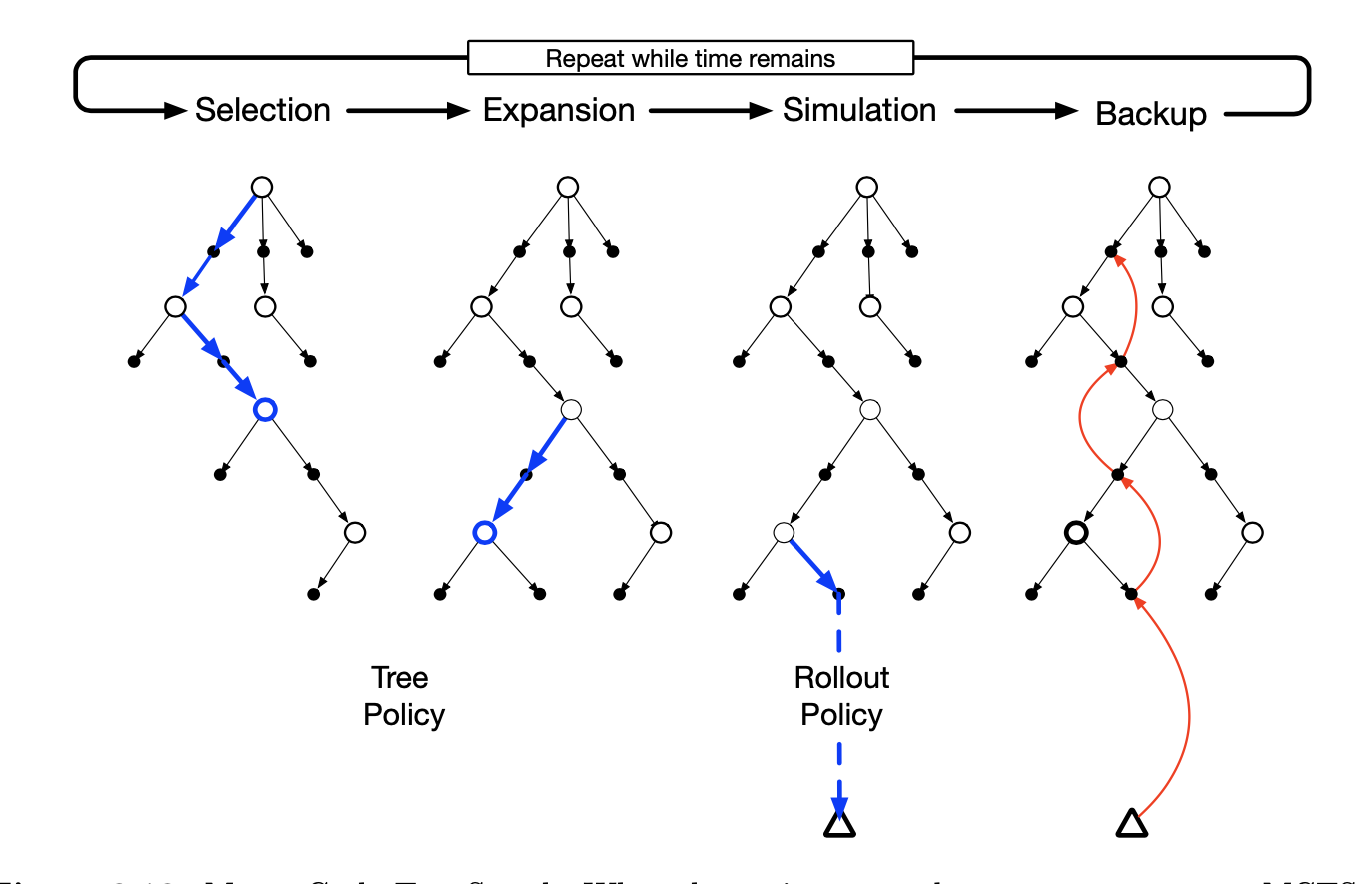
</div>

1. Selection: Starting at the root node a tree policy based on the action values attached to the edges of the tree traverses the tree to select a leaf node.
2. Expansion: On some iterations the tree is expanded from the selected leaf node by adding one or more child nodes reached from the selected node via unexplored actions.
3. Simulation: From the selected node or from one of its newly added child nodes, simulation of a complete episode is run with actions selected by the rollout policy. The result is a Monte Carlo trial with actions selected first by the tree policy and beyond the tree by the rollout policy.
4. backup: The return generated by the simulated episode is backed up to update or to initialize the action values attached to the edges of the tree traversed by the tree policy in this iteration of MCTS. No values are saved for the states and actions visited by the rollout policy beyond the tree.

These steps are repeated until the computation is broken off. At this point an action is selected from the root node according to some mechanusm. This is in standard MCTS the action with the largest visit count (to avoid selecting outliers). Then MCTS is restarted albeit without information or descendants left over from the previous run. By incrementally expanding the tree, MCTS effectively grows a lookup table to store a partial action-value function, with memory allocated to the estimated values of state–action pairs visited in the initial segments of high-yielding sample trajectories. MCTS thus avoids the problem of globally approximating an action-value function while it retains the benefit of using past experience to guide exploration.